In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

cleveland = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names=column_names)
cleveland['source'] = 'cleveland'

hungarian = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data", names=column_names, sep=' ')
hungarian = hungarian[:-1]
hungarian['source'] = 'hungarian'

switzerland = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", names=column_names)
switzerland['source'] = 'switzerland'

long_beach = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", names=column_names)
long_beach['source'] = 'long_beach'

In [3]:
full_dat = pd.concat([cleveland, hungarian, switzerland, long_beach], ignore_index=True)
full_dat = full_dat.replace('?', np.NaN)

In [4]:
full_dat.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
915,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1.0,long_beach
916,62.0,1.0,1.0,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,long_beach
917,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2.0,long_beach
918,58.0,1.0,4.0,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,long_beach
919,62.0,1.0,2.0,120,254,0,2,93,1,0,NaN,NaN,NaN,1.0,long_beach


# Attributes

| Attribute | Description                                                                                                                                                                                                                                   | Type                   |
|:---------:|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------|
|    age    | Age in years                                                                                                                                                                                                                                  | Numerical (Discrete)   |
|    sex    | 1: male<br> 0: female                                                                                                                                                                                                                         | Category               |
|     cp    | Chest pain type<br> 1: typical angina<br> 2: atypical angina<br> 3: non-anginal pain<br> 4: asymptomatic                                                                                                                                      | Category               |
|  trestbps | Resting blood pressure (in mm Hg on admission to the hospital)                                                                                                                                                                                | Numerical (Continuous) |
|    chol   | Serum cholestoral in mg/dl                                                                                                                                                                                                                    | Numerical (Continuous) |
|    fbs    | Fasting blood sugar > 120 mg/d<br> 1: true<br> 0: false                                                                                                                                                                                       | Category               |
|  restecg  | Resting electrocardiographic results<br> 0: normal<br> 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br> 2: showing probable or definite left ventricular hypertrophy by Estes' criteria | Category               |
|  thalach  | Maximum heart rate achieved                                                                                                                                                                                                                   | Numerical (Continuous) |
|   exang   | Exercise induced angina<br> 1: yes<br> 0: no                                                                                                                                                                                                  | Category               |
|  oldpeak  | ST depression induced by exercise relative to rest                                                                                                                                                                                            | Numerical (Continuous) |
|   slope   | The slope of the peak exercise ST segment<br> 1: upsloping<br> 2: flat<br> 3: downsloping<br>                                                                                                                                                 | Category               |
|     ca    | Number of major vessels (0-3) colored by flourosopy                                                                                                                                                                                           | Numerical (Discrete)   |
|    thal   | 3: normal<br> 6: fixed defect<br> 7: reversable defect                                                                                                                                                                                        | Category               |
|    num    | Diagnosis of heart disease (angiographic disease status)                                                                                                                                                                                      | Category               |
|    source    | Source of the data set                                                                                                                                                                                      | Category               |

In [7]:
init_notebook_mode(connected=True)

# TBD

In [8]:
source_counts = pd.value_counts(full_dat['source'])
source_counts

cleveland      303
hungarian      294
long_beach     200
switzerland    123
Name: source, dtype: int64

In [9]:
trace = go.Bar(
    x = source_counts.index.values,
    y = source_counts.values
)

data = [trace]

layout = go.Layout(
    title= 'Sample Numbers of Each Source',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

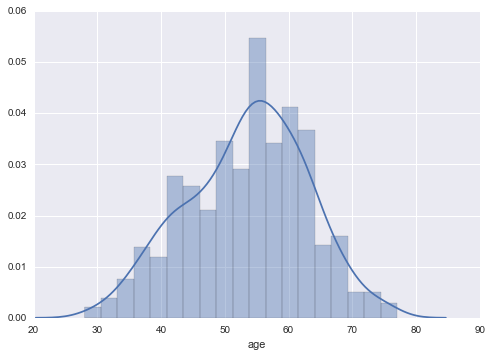

In [43]:
sns.distplot(full_dat.age)

In [237]:
full_dat['diseased'] = full_dat['num'].map({0: 'Not diseased', 1: 'Diseased', 2: 'Diseased', 3: 'Diseased'})
diseased_counts = pd.value_counts(full_dat['diseased']).to_frame()
diseased_counts.columns = ['Numbers']

In [218]:
figure = ff.create_table(diseased_counts, index=True)

In [219]:
iplot(figure)

In [242]:
trace = go.Bar(
    x = diseased_counts.index.values,
    y = diseased_counts['Numbers'].values,
    marker = dict(color='rgb(158,202,225)')
)

data = [trace]

layout = go.Layout(
    title='TBD'
)

figure = go.Figure(data=data, layout=layout)
iplot(figure)

In [252]:
diseased = full_dat[full_dat['diseased'] == 'Diseased'][['num', 'diseased']]
diseased['type'] = diseased['num'].map({1: 'Type1', 2: 'Type2', 3: 'Type3'})
diseased_type_counts = pd.value_counts(diseased['type']).to_frame()
diseased_type_counts.columns = ['Numbers']
diseased_type_counts = diseased_type_counts.sort_index()

In [253]:
figure = ff.create_table(diseased_type_counts, index=True)

In [254]:
iplot(figure)

In [255]:
trace = go.Bar(
    x = diseased_type_counts.index.values,
    y = diseased_type_counts['Numbers'].values,
    marker = dict(color='rgb(158,202,225)')
)

data = [trace]

layout = go.Layout(
    title='TBD'
)

figure = go.Figure(data=data, layout=layout)
iplot(figure)